In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To separate data intro train and test sets.
from sklearn.model_selection import train_test_split

In [2]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [3]:
# Let's look at the different number of labels
# in each variable (cardinality).

cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print("Variable", col, "has number of labels:", data[col].nunique())

Variable Neighborhood has number of labels: 25
Variable Exterior1st has number of labels: 15
Variable Exterior2nd has number of labels: 16


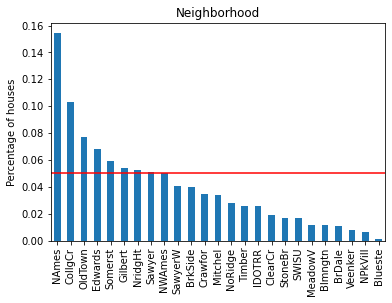

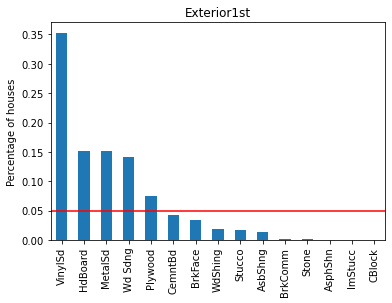

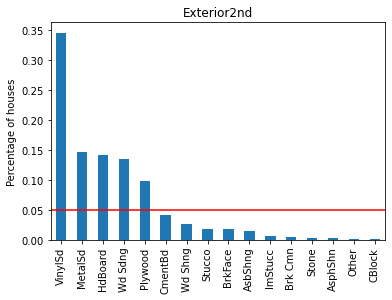

In [4]:
# Let's plot the category frequency.
# That is, the percentage of houses with each label.

total_houses = len(data)

# for each categorical variable
for col in cat_cols:
    
    df_temp = data[col].value_counts() / total_houses
    
    # make a plot of this percentages
    fig = figsize=(15,7)
    fig = df_temp.sort_values(ascending=False).plot.bar()
    
    # add a line at 5% to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    fig.set_title(col)
    plt.xticks(rotation=90)
    plt.show()

In [5]:
# The labels below 5% can cause overfitting

In [28]:
# Percentage of houses per category

def calculate_mean_target_per_category(df, var):
    
    total_houses = len(df)
    
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'house_perc']
    
    # add mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')
    
    return temp_df

In [29]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')

In [30]:
temp_df

,Neighborhood,house_perc,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


In [33]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# Sale Price and the categories.

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

In [32]:
def group_rare_labels(df, var):
    
    total_houses = len(df)
    
    # calculate the % of houses per category.
    # var becomes an index
    temp_df = pd.Series(df[var].value_counts() / total_houses)
    
    rare_label = 

    return temp_df

In [36]:
temp = group_rare_labels(data, 'Neighborhood')
temp

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [83]:
for k, i in zip(temp.index, temp):
    if i <= 0.05:
       temp.replace({})

NWAmes
SawyerW
BrkSide
Crawfor
Mitchel
NoRidge
Timber
IDOTRR
ClearCr
StoneBr
SWISU
MeadowV
Blmngtn
BrDale
Veenker
NPkVill
Blueste


In [82]:
temp.loc[temp < 0.05] 

SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [81]:
temp

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64